## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value



## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.

## Data preparation

In [ ]:
# !pip install -U seaborn
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [ ]:
# !wget $data

In [ ]:
# !head housing.csv

In [6]:
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [9]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [10]:
# Missing values
df.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010008
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [11]:
df = df.fillna(0)

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,535.827755,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,436.799797,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,0.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,291.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,429.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,642.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# Log transform
house_value_logs = np.log1p(df.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

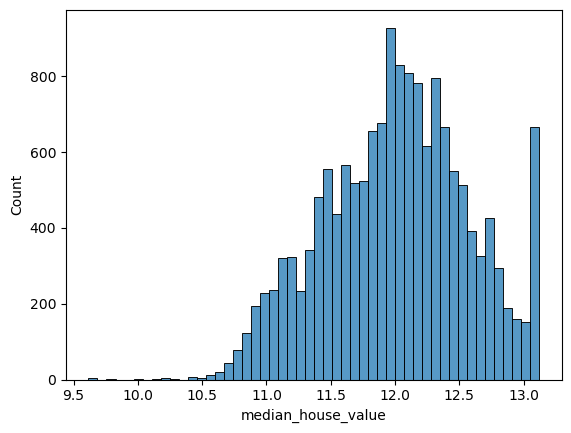

In [14]:
sns.histplot(house_value_logs, bins=50)

In [15]:
# Split data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_text

In [21]:
train_dicts = df_train.to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [23]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
train_dicts[0:2]

[{'longitude': -120.25,
  'latitude': 37.93,
  'housing_median_age': 13.0,
  'total_rooms': 493.0,
  'total_bedrooms': 76.0,
  'population': 196.0,
  'households': 68.0,
  'median_income': 3.375,
  'ocean_proximity': 'INLAND'},
 {'longitude': -118.4,
  'latitude': 34.0,
  'housing_median_age': 10.0,
  'total_rooms': 1526.0,
  'total_bedrooms': 339.0,
  'population': 705.0,
  'households': 268.0,
  'median_income': 5.8083,
  'ocean_proximity': '<1H OCEAN'}]

## Question 1

### Decision tree regression

In [26]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [27]:
# Evaluation
y_pred_val = dt.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

0.45168599736547216

In [28]:
# Evaluation on the training dataset
y_pred_train = dt.predict(X_train)
mean_squared_error(y_train, y_pred_train, squared=False)

0.4522449592423713

In [29]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



Answer: `ocean_proximity`

## Question 2

### Random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
%%time 

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse_val = mean_squared_error(y_val, y_pred, squared=False)

CPU times: user 4.06 s, sys: 15.8 ms, total: 4.07 s
Wall time: 1.22 s


In [35]:
print(f"rmse_val: {rmse_val:.3f}")

rmse_val: 0.245


Answer: 0.245

## Question 3

### Random Forest Regression

In [36]:
# Training models with different values of n_estimators
%%time

scores = []
for n in range(10, 201, 10):  
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_val = mean_squared_error(y_val, y_pred, squared=False)
    scores.append((n, rmse_val))

CPU times: user 15min 26s, sys: 3.34 s, total: 15min 30s
Wall time: 3min 59s


In [37]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

Text(0, 0.5, 'RMSE')

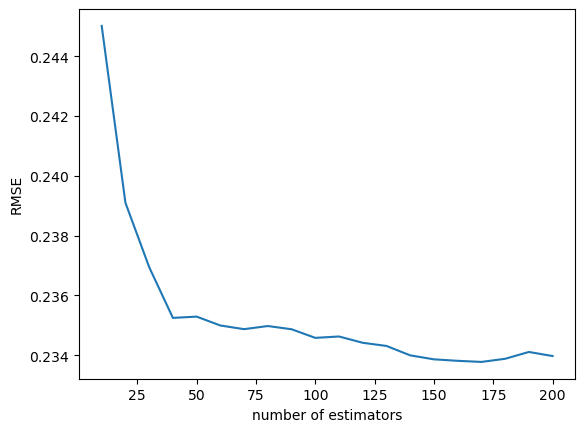

In [38]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.xlabel("number of estimators")
plt.ylabel("RMSE")

In [39]:
print(f"rmse: { df_scores.rmse.min():.3f}")

rmse: 0.234


Answer: The RMSE stop improving at `n_estimators=160`.

## Question 4

In [41]:
%%time

### Training models with different values of max_depth and n_estimators 
max_depths = [10, 15, 20, 25]

scores = []

for max_depth in max_depths:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_val = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((max_depth, n, rmse_val))

CPU times: user 46min 50s, sys: 8.24 s, total: 46min 58s
Wall time: 12min 5s


In [42]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

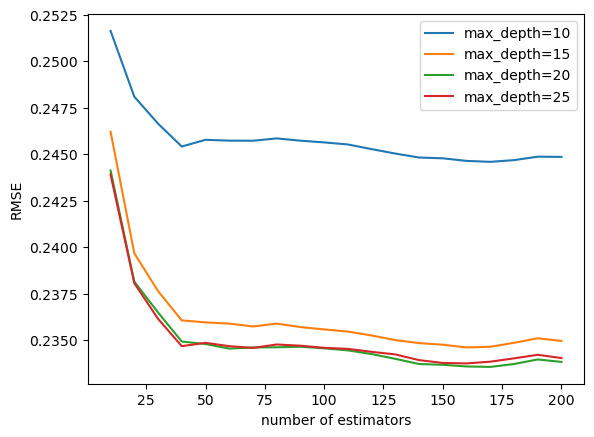

In [44]:
for d in max_depths:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rmse, label='max_depth=%d' % d)
    plt.xlabel("number of estimators")
    plt.ylabel("RMSE")

plt.legend()

Answer: Best RMSE at `max_depth=20` and `n_estimators=160`.

## Question 5

### Feature importance

In [47]:
%%time

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse_val = mean_squared_error(y_val, y_pred, squared=False)
rmse_val

CPU times: user 3.94 s, sys: 3.9 ms, total: 3.94 s
Wall time: 1.19 s


0.24412545993268053

In [61]:
pd.DataFrame(
    {
        'feature': list(dv.get_feature_names_out()),
        'importance': rf.feature_importances_
    }
).sort_values(by='importance', ascending=False)

,feature,importance
4,median_income,0.335448
5,ocean_proximity=<1H OCEAN,0.292473
2,latitude,0.102740
3,longitude,0.085853
6,ocean_proximity=INLAND,0.073806
1,housing_median_age,0.030163
7,population,0.027186
9,total_rooms,0.021133
0,households,0.015639
8,total_bedrooms,0.015557


Answer: The most important feature is `median_income`.

## Question 6

### XGBoost 

In [110]:
import xgboost as xgb

In [111]:
list(dv.get_feature_names_out())

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [112]:
feature_names = [
    'households', 'housing_median_age', 'latitude', 'longitude',
    'median_income', 'ocean_proximity=1H OCEAN',
    'ocean_proximity=INLAND', 'population', 'total_bedrooms',
    'total_rooms'
]

In [113]:
# Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

In [114]:
# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

Learning rate (eta) parameter tuning

In [115]:
etas = [0.3, 0.1]

In [116]:
scores = {}

In [117]:
%%capture output

for eta in etas:    
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                      evals=watchlist)

In [118]:
print(output.stdout[:100])

[0]	train-rmse:0.44350	val-rmse:0.44250
[5]	train-rmse:0.25338	val-rmse:0.27463
[10]	train-rmse:0.21


In [119]:
# Extract scores from 'output'
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [120]:
parse_xgb_output(output).head()

,num_iter,train_rmse,val_rmse
0,0,0.44350,0.44250
1,5,0.25338,0.27463
2,10,0.21444,0.25179
3,15,0.19858,0.24522
4,20,0.18524,0.23978


Plot iterations

In [121]:
parse_output = parse_xgb_output(output)
rows_per_eta = len(parse_output) // len(etas)

for i, eta in enumerate(etas):
    key = 'eta=%s' % (eta)
    start_row = i * rows_per_eta
    end_row = (i + 1) * rows_per_eta
    scores[key] = parse_output[start_row:end_row]

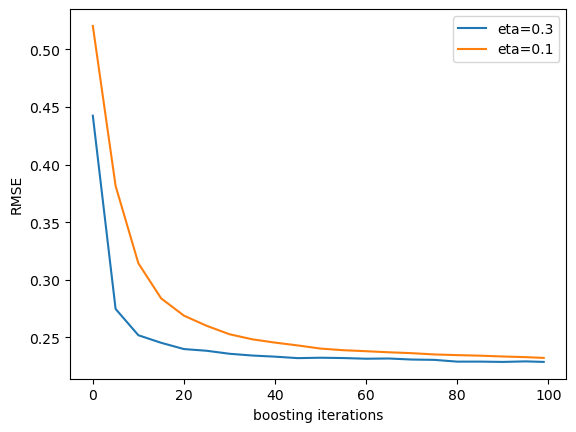

In [122]:
for key, df_score in list(scores.items()):
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.xlabel('boosting iterations')
plt.ylabel('RMSE')
plt.legend()

Answer: Best RMSE at 100 iterations with a `eta` of 0.3.